# Module import

In [1]:
# import os, glob
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
# os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import os, glob
from PIL import Image
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [80]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
os.getenv('HOME')

'/home/aiffel-004'

In [5]:
# convert png -> jpg
def convert_png_to_jpg(img_path):
    images = glob.glob(img_path + "/*.png")
    for img in images:
        img_open = Image.open(img)
        img_open.save(img[:-4]+".jpg")

In [6]:
image_path = os.getenv("HOME") + "/Documents/aiffel_project/AIFFEL/Exploration1/rock_scissor_paper/train/*"
convert_png_to_jpg(image_path)

In [7]:
def delete_png(img_path):
    images = glob.glob(img_path + "/*.png")
    for img in images:
        os.remove(img)

In [8]:
delete_png(image_path)

In [9]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 32x32 사이즈로 바꾸어 저장합니다.
	target_size=(32,32)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [10]:
# 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
resize_images(image_path)

print("가위, 바위, 보 이미지 resize 완료!")

2188  images to be resized.
2188  images resized.
가위, 바위, 보 이미지 resize 완료!


In [11]:
def load_data(img_path, number_of_data):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 바위 : 0, 보 : 1, 가위 : 2
    img_size=32
    color=3
    #이미지 데이터와 라벨(바위 : 0, 가위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 바위 : 0
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 보 : 1
        idx=idx+1
        
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 가위 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/Documents/aiffel_project/AIFFEL/Exploration1/rock_scissor_paper/train"
(x_train, y_train)=load_data(image_dir_path, len(glob.glob(image_path+"/*")))
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2188 입니다.
x_train shape: (2188, 32, 32, 3)
y_train shape: (2188,)


라벨:  1


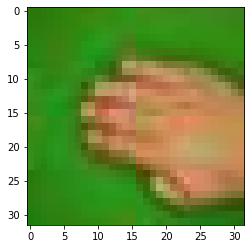

In [12]:
plt.imshow(x_train[1000])
print('라벨: ', y_train[1000])

In [13]:
# model(LeNet)
tf.random.set_seed(1234)
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                36896     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

In [14]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=20)

Epoch 1/20
69/69 [==============================] - 4s 56ms/step - loss: 0.7918 - accuracy: 0.6824
Epoch 2/20
69/69 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8995
Epoch 3/20
69/69 [==============================] - 0s 2ms/step - loss: 0.1988 - accuracy: 0.9360
Epoch 4/20
69/69 [==============================] - 0s 2ms/step - loss: 0.1429 - accuracy: 0.9511
Epoch 5/20
69/69 [==============================] - 0s 2ms/step - loss: 0.1145 - accuracy: 0.9602
Epoch 6/20
69/69 [==============================] - 0s 2ms/step - loss: 0.0983 - accuracy: 0.9689
Epoch 7/20
69/69 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 0.9703
Epoch 8/20
69/69 [==============================] - 0s 2ms/step - loss: 0.0685 - accuracy: 0.9776
Epoch 9/20
69/69 [==============================] - 0s 2ms/step - loss: 0.0624 - accuracy: 0.9799
Epoch 10/20
69/69 [==============================] - 0s 2ms/step - loss: 0.0478 - accuracy: 0.9863
Epoch 11/20
69/69 

In [15]:
# TEST image
test_image_path = os.getenv("HOME") + "/Documents/aiffel_project/AIFFEL/Exploration1/rock_scissor_paper/test/*"
resize_images(test_image_path)

4285  images to be resized.
4285  images resized.


In [16]:
def load_test_data(img_path, number_of_data):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 바위 : 0, 보 : 1, 가위 : 2
    img_size=32
    color=3
    #이미지 데이터와 라벨(바위 : 0, 가위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 바위 : 0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 보 : 1
        idx=idx+1
    
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 가위 : 2
        idx=idx+1
     
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

test_dir_path = os.getenv("HOME") + "/Documents/aiffel_project/AIFFEL/Exploration1/rock_scissor_paper/test"
(x_test, y_test)=load_test_data(test_dir_path, len(glob.glob(test_image_path+'/*')))
x_test_norm = x_test/255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 4285 입니다.
x_test shape: (4285, 32, 32, 3)
y_test shape: (4285,)


In [17]:
# evaluate test images
test_loss, test_acc = model.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 2s - loss: 7.2776 - accuracy: 0.3475


예측확률분포: [2.7088649e-03 9.9729115e-01 4.8486690e-08]
라벨: 2, 예측결과: 1


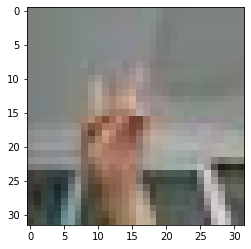

예측확률분포: [4.1452995e-01 5.8546931e-01 6.8318963e-07]
라벨: 0, 예측결과: 1


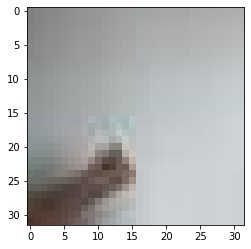

예측확률분포: [8.2282543e-01 1.7717463e-01 4.7376428e-08]
라벨: 1, 예측결과: 0


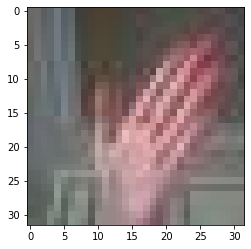

예측확률분포: [3.3804992e-01 6.6195005e-01 6.7752187e-10]
라벨: 2, 예측결과: 1


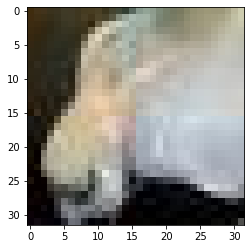

예측확률분포: [5.3153550e-03 9.9467933e-01 5.3938406e-06]
라벨: 0, 예측결과: 1


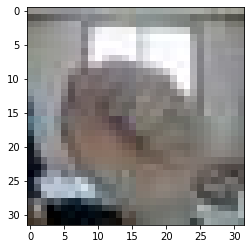

In [18]:
import random
### 어떠한 정보를 잘못예측하는지 알아보기 ###
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
# print(predicted_result.shape) # (300, 3)
predicted_labels = np.argmax(predicted_result, axis=1)
# print(predicted_labels.shape) # (300, )

wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)


# 5개만 추출
samples = random.choices(population=wrong_predict_list, k=5)
for n in samples:
    # print(n)
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 현 시점에서 생각해볼 수 있는 부분
### 학습이 전혀 되고 있지 않은 듯 하다.. why?

- 저해상도 이미지를 학습시켜서 발생하는 issue인가?
- trainset이 너무 적었다 (Overfitting)
- trainset과 testset의 분포의 괴리가 너무 크다
- 모델에서 특징을 잡는 파라미터를 너무 작게 잡았다

# Additional Training

### 1 - 1) trainset이 너무 적다 --> 추가 학습 시행

In [19]:
import tensorflow_datasets as tfds

In [20]:
print(tfds.list_builders())

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'bair_robot_pushing_small', 'bccd', 'beans', 'bee_dataset', 'beir', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'cherry_blossoms', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19', 'covid19sum', 'crema_d', 'criteo', 'cs_restaurants', 'curated_breast_imaging_ddsm', 'cycle_gan', 'd4rl_adroit_door', 'd4rl_ad

In [21]:
DATASET_NAME = 'rock_paper_scissors'

(dataset_train_raw, dataset_test_raw), dataset_info = tfds.load(
    name=DATASET_NAME,
    data_dir='tmp',
    with_info=True,
    as_supervised=True,
    split=[tfds.Split.TRAIN, tfds.Split.TEST],
)

In [22]:
print('Raw train dataset:', dataset_train_raw)
print('Raw train dataset size:', len(list(dataset_train_raw)), '\n')

print('Raw test dataset:', dataset_test_raw)
print('Raw test dataset size:', len(list(dataset_test_raw)), '\n')

Raw train dataset: <PrefetchDataset shapes: ((300, 300, 3), ()), types: (tf.uint8, tf.int64)>
Raw train dataset size: 2520 

Raw test dataset: <PrefetchDataset shapes: ((300, 300, 3), ()), types: (tf.uint8, tf.int64)>
Raw test dataset size: 372 



In [23]:
dataset_info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='tmp/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)

In [24]:
NUM_TRAIN_EXAMPLES = dataset_info.splits['train'].num_examples
NUM_TEST_EXAMPLES = dataset_info.splits['test'].num_examples
NUM_CLASSES = dataset_info.features['label'].num_classes

print('Number of TRAIN examples:', NUM_TRAIN_EXAMPLES)
print('Number of TEST examples:', NUM_TEST_EXAMPLES)
print('Number of label classes:', NUM_CLASSES)

Number of TRAIN examples: 2520
Number of TEST examples: 372
Number of label classes: 3


In [25]:
# Function to convert label ID to labels string.
get_label_name = dataset_info.features['label'].int2str

In [26]:
print(get_label_name(0));
print(get_label_name(1));
print(get_label_name(2));

rock
paper
scissors


The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


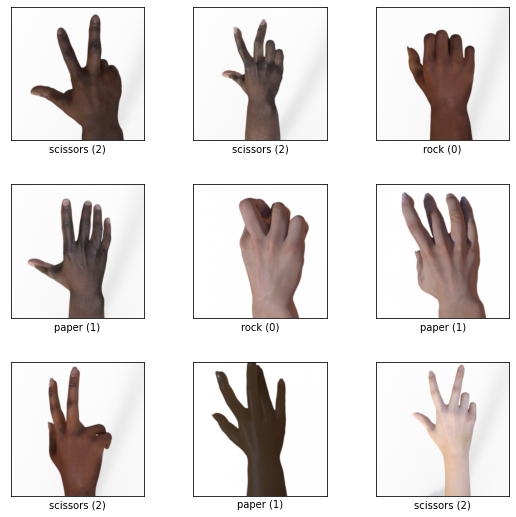

In [27]:
fig = tfds.show_examples(dataset_info, dataset_train_raw)

In [28]:
def format_example(image, label):
    # Make image color values to be float.
    image = tf.cast(image, tf.float32)
    # Make image color values to be in [0..1] range.
    image = image / 255.
    # Make sure that image has a right size
    image = tf.image.resize(image, [32, 32])
    return image, label

In [29]:
dataset_train = dataset_train_raw.map(format_example)
dataset_test = dataset_test_raw.map(format_example)

In [30]:
BATCH_SIZE = 32

dataset_train = dataset_train.shuffle(
    buffer_size=NUM_TRAIN_EXAMPLES
)

dataset_train = dataset_train.batch(
    batch_size=BATCH_SIZE
)

# Prefetch will enable the input pipeline to asynchronously fetch batches while your model is training.
dataset_train = dataset_train.prefetch(
    buffer_size=tf.data.experimental.AUTOTUNE
)

dataset_test_shuffled = dataset_test.batch(BATCH_SIZE)

Label batch shape: (32,) 

Image batch shape: (32, 32, 32, 3) 

Label batch: [2 1 1 1 0 2 0 2 2 1 2 2 2 0 0 0 1 1 1 0 1 1 0 2 0 1 2 1 1 0 2 1] 

First batch image: [[[0.9927543  0.9927543  0.9927543 ]
  [0.9943628  0.9943628  0.9943628 ]
  [0.9960325  0.9960325  0.9960325 ]
  ...
  [0.9861366  0.9861366  0.9861366 ]
  [0.985049   0.985049   0.985049  ]
  [0.98704046 0.98704046 0.98704046]]

 [[0.99215686 0.99215686 0.99215686]
  [0.9931219  0.9931219  0.9931219 ]
  [0.9940104  0.9940104  0.9940104 ]
  ...
  [0.9885876  0.9885876  0.9885876 ]
  [0.9858149  0.9858149  0.9858149 ]
  [0.98365504 0.98365504 0.98365504]]

 [[0.99289215 0.99289215 0.99289215]
  [0.99215686 0.99215686 0.99215686]
  [0.99238664 0.99238664 0.99238664]
  ...
  [0.991682   0.991682   0.991682  ]
  [0.9921262  0.9921262  0.9921262 ]
  [0.9810815  0.9810815  0.9810815 ]]

 ...

 [[0.9873928  0.9873928  0.9873928 ]
  [0.9876379  0.9876379  0.9876379 ]
  [0.9879902  0.9879902  0.9879902 ]
  ...
  [0.9723039  0.9723039

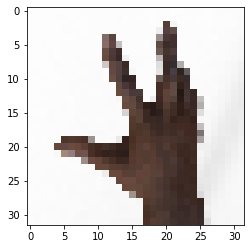

In [31]:
# Debugging the batches using conversion to Numpy arrays.
batches = tfds.as_numpy(dataset_train)
for batch in batches:
    image_batch, label_batch = batch
    print('Label batch shape:', label_batch.shape, '\n')
    print('Image batch shape:', image_batch.shape, '\n')
    print('Label batch:', label_batch, '\n')
    
    for batch_item_index in range(len(image_batch)):
        print('First batch image:', image_batch[batch_item_index], '\n')
        plt.imshow(image_batch[batch_item_index])
        plt.show()
        # Break to shorten the output.
        break
    # Break to shorten the output.
    break

In [32]:
steps_per_epoch = NUM_TRAIN_EXAMPLES // BATCH_SIZE
validation_steps = NUM_TEST_EXAMPLES // BATCH_SIZE

print('steps_per_epoch:', steps_per_epoch)
print('validation_steps:', validation_steps)

steps_per_epoch: 78
validation_steps: 11


In [33]:
training_history = model.fit(
    x=dataset_train.repeat(),
    validation_data=dataset_test_shuffled.repeat(),
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/15
78/78 [==============================] - 0s 4ms/step - loss: 0.7595 - accuracy: 0.7652 - val_loss: 0.8246 - val_accuracy: 0.7727
Epoch 2/15
78/78 [==============================] - 1s 9ms/step - loss: 0.1367 - accuracy: 0.9703 - val_loss: 0.5909 - val_accuracy: 0.8636
Epoch 3/15
78/78 [==============================] - 1s 9ms/step - loss: 0.0481 - accuracy: 0.9940 - val_loss: 0.5420 - val_accuracy: 0.8494
Epoch 4/15
78/78 [==============================] - 1s 9ms/step - loss: 0.0246 - accuracy: 0.9956 - val_loss: 0.6242 - val_accuracy: 0.8580
Epoch 5/15
78/78 [==============================] - 1s 10ms/step - loss: 0.0204 - accuracy: 0.9968 - val_loss: 0.5548 - val_accuracy: 0.8438
Epoch 6/15
78/78 [==============================] - 1s 12ms/step - loss: 0.0118 - accuracy: 0.9984 - val_loss: 0.5686 - val_accuracy: 0.8523
Epoch 7/15
78/78 [==============================] - 1s 9ms/step - loss: 0.0073 - accuracy: 0.9996 - val_loss: 0.5687 - val_accuracy: 0.7983
Epoch 8/15
78/78 [

In [34]:
# evaluate test images
test_loss, test_acc = model.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 0s - loss: 4.3101 - accuracy: 0.4380


In [35]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

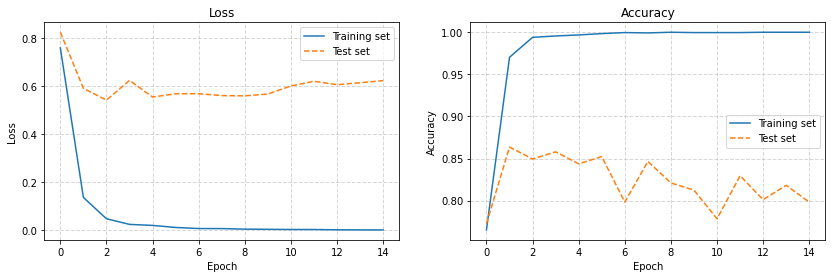

In [36]:
render_training_history(training_history)

### 1 - 2) trainset이 너무 적다 --> Data Augmentation

In [37]:
def augment_flip(image: tf.Tensor) -> tf.Tensor:
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image

In [38]:
def augment_color(image: tf.Tensor) -> tf.Tensor:
    image = tf.image.random_hue(image, max_delta=0.08)
    image = tf.image.random_saturation(image, lower=0.7, upper=1.3)
    image = tf.image.random_brightness(image, 0.05)
    image = tf.image.random_contrast(image, lower=0.8, upper=1)
    image = tf.clip_by_value(image, clip_value_min=0, clip_value_max=1)
    return image

In [39]:
def augment_rotation(image: tf.Tensor) -> tf.Tensor:
    # Rotate 0, 90, 180, 270 degrees
    return tf.image.rot90(
        image,
        tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
    )

In [40]:
def augment_inversion(image: tf.Tensor) -> tf.Tensor:
    random = tf.random.uniform(shape=[], minval=0, maxval=1)
    if random > 0.5:
        image = tf.math.multiply(image, -1)
        image = tf.math.add(image, 1)
    return image

In [41]:
def augment_zoom(image: tf.Tensor, min_zoom=0.8, max_zoom=1.0) -> tf.Tensor:
    image_width, image_height, image_colors = image.shape
    crop_size = (image_width, image_height)

    # Generate crop settings, ranging from a 1% to 20% crop.
    scales = list(np.arange(min_zoom, max_zoom, 0.01))
    boxes = np.zeros((len(scales), 4))

    for i, scale in enumerate(scales):
        x1 = y1 = 0.5 - (0.5 * scale)
        x2 = y2 = 0.5 + (0.5 * scale)
        boxes[i] = [x1, y1, x2, y2]

    def random_crop(img):
        # Create different crops for an image
        crops = tf.image.crop_and_resize(
            [img],
            boxes=boxes,
            box_indices=np.zeros(len(scales)),
            crop_size=crop_size
        )
        # Return a random crop
        return crops[tf.random.uniform(shape=[], minval=0, maxval=len(scales), dtype=tf.int32)]

    choice = tf.random.uniform(shape=[], minval=0., maxval=1., dtype=tf.float32)

    # Only apply cropping 50% of the time
    return tf.cond(choice < 0.5, lambda: image, lambda: random_crop(image))

In [42]:
def augment_data(image, label):
    image = augment_flip(image)
    image = augment_color(image)
    image = augment_rotation(image)
    # image = augment_zoom(image)
    image = augment_inversion(image)
    return image, label

In [43]:
dataset_train = dataset_train_raw.map(format_example)
dataset_test = dataset_test_raw.map(format_example)

In [44]:
dataset_train_augmented = dataset_train.map(augment_data)

In [45]:
def preview_dataset(dataset):
    plt.figure(figsize=(12, 12))
    plot_index = 0
    for features in dataset.take(12):
        (image, label) = features
        plot_index += 1
        plt.subplot(3, 4, plot_index)
        # plt.axis('Off')
        # print(label)
        # print(label.numpy())
        label = get_label_name(label.numpy())
        plt.title('Label: %s' % label)
        plt.imshow(image.numpy())

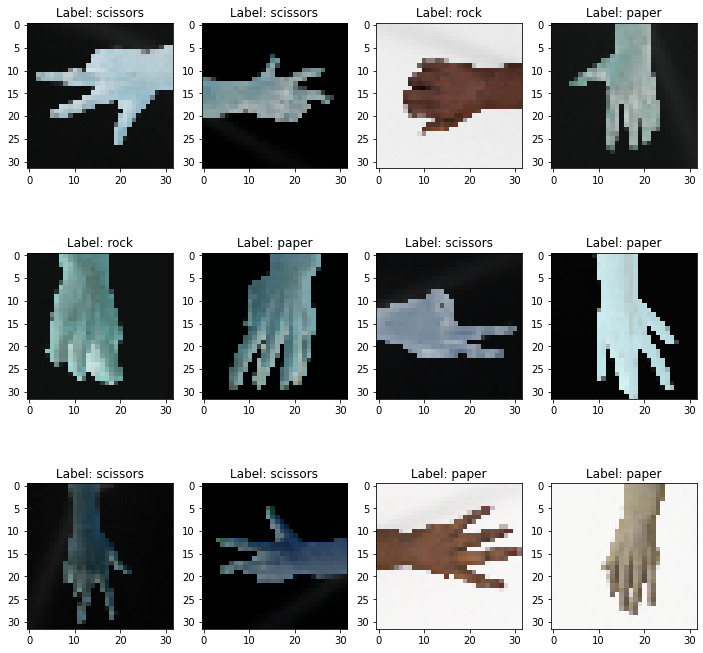

In [46]:
# Explore augmented training dataset.
preview_dataset(dataset_train_augmented)

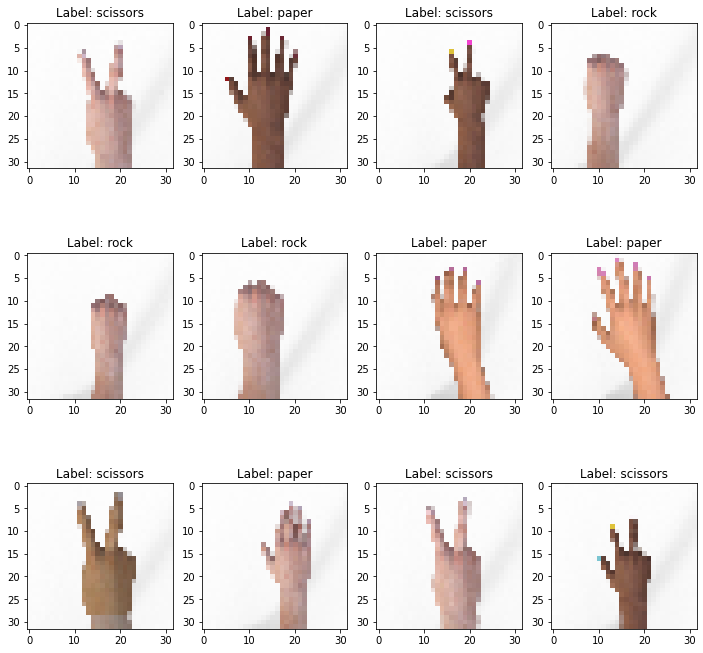

In [47]:
# Explore test dataset.
preview_dataset(dataset_test)

In [48]:
BATCH_SIZE = 32

dataset_train_augmented = dataset_train_augmented.shuffle(
    buffer_size=NUM_TRAIN_EXAMPLES
)

dataset_train_augmented = dataset_train_augmented.batch(
    batch_size=BATCH_SIZE
)

# Prefetch will enable the input pipeline to asynchronously fetch batches while your model is training.
dataset_train_augmented = dataset_train_augmented.prefetch(
    buffer_size=tf.data.experimental.AUTOTUNE
)

dataset_test_shuffled = dataset_test.batch(BATCH_SIZE)

In [49]:
training_history = model.fit(
    x=dataset_train_augmented.repeat(),
    validation_data=dataset_test_shuffled.repeat(),
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/15
78/78 [==============================] - 0s 4ms/step - loss: 1.2445 - accuracy: 0.4175 - val_loss: 1.0585 - val_accuracy: 0.5000
Epoch 2/15
78/78 [==============================] - 1s 13ms/step - loss: 0.7971 - accuracy: 0.6644 - val_loss: 0.8931 - val_accuracy: 0.6250
Epoch 3/15
78/78 [==============================] - 1s 13ms/step - loss: 0.5633 - accuracy: 0.7814 - val_loss: 0.6456 - val_accuracy: 0.7528
Epoch 4/15
78/78 [==============================] - 1s 12ms/step - loss: 0.3631 - accuracy: 0.8666 - val_loss: 0.9110 - val_accuracy: 0.6108
Epoch 5/15
78/78 [==============================] - 1s 11ms/step - loss: 0.2894 - accuracy: 0.9055 - val_loss: 0.4888 - val_accuracy: 0.7926
Epoch 6/15
78/78 [==============================] - 1s 12ms/step - loss: 0.2319 - accuracy: 0.9244 - val_loss: 0.5295 - val_accuracy: 0.7670
Epoch 7/15
78/78 [==============================] - 1s 12ms/step - loss: 0.1734 - accuracy: 0.9409 - val_loss: 0.4108 - val_accuracy: 0.8324
Epoch 8/15
78/

In [50]:
# evaluate test images
test_loss, test_acc = model.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 0s - loss: 3.0624 - accuracy: 0.4380


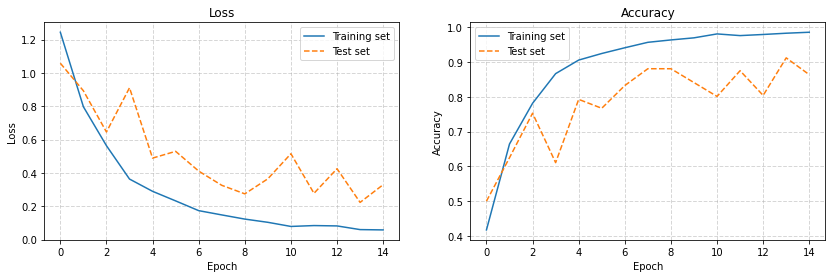

In [51]:
render_training_history(training_history)

### 2) 모델에서 특징을 잡는 파라미터를 너무 작게 잡았다 -> 모델 파라미터 재조정

In [52]:
# model(LeNet)
tf.random.set_seed(1234)
model2 = keras.models.Sequential()
model2.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(keras.layers.MaxPool2D(2, 2))
model2.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(keras.layers.MaxPool2D(2, 2))
model2.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(keras.layers.MaxPool2D(2, 2))

model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dense(32, activation='relu'))
model2.add(keras.layers.Dense(3, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

In [53]:
model2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model2.fit(x_train_norm, y_train, epochs=15)

Epoch 1/15
69/69 [==============================] - 4s 55ms/step - loss: 0.7883 - accuracy: 0.6645
Epoch 2/15
69/69 [==============================] - 0s 2ms/step - loss: 0.2522 - accuracy: 0.9255
Epoch 3/15
69/69 [==============================] - 0s 2ms/step - loss: 0.1101 - accuracy: 0.9676
Epoch 4/15
69/69 [==============================] - 0s 2ms/step - loss: 0.0797 - accuracy: 0.9744
Epoch 5/15
69/69 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 0.9712
Epoch 6/15
69/69 [==============================] - 0s 2ms/step - loss: 0.0583 - accuracy: 0.9817
Epoch 7/15
69/69 [==============================] - 0s 2ms/step - loss: 0.0429 - accuracy: 0.9895
Epoch 8/15
69/69 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9854
Epoch 9/15
69/69 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9886
Epoch 10/15
69/69 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9927
Epoch 11/15
69/69 

In [54]:
# evaluate test images
test_loss, test_acc = model2.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 2s - loss: 5.7560 - accuracy: 0.3519


In [55]:
BATCH_SIZE = 32

dataset_train = dataset_train.shuffle(
    buffer_size=NUM_TRAIN_EXAMPLES
)

dataset_train = dataset_train.batch(
    batch_size=BATCH_SIZE
)

# Prefetch will enable the input pipeline to asynchronously fetch batches while your model is training.
dataset_train = dataset_train.prefetch(
    buffer_size=tf.data.experimental.AUTOTUNE
)

dataset_test_shuffled = dataset_test.batch(BATCH_SIZE)

In [56]:
training_history = model2.fit(
    x=dataset_train.repeat(),
    validation_data=dataset_test_shuffled.repeat(),
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/15
78/78 [==============================] - 0s 5ms/step - loss: 0.8383 - accuracy: 0.7240 - val_loss: 0.5304 - val_accuracy: 0.8835
Epoch 2/15
78/78 [==============================] - 1s 9ms/step - loss: 0.1081 - accuracy: 0.9707 - val_loss: 0.3667 - val_accuracy: 0.8949
Epoch 3/15
78/78 [==============================] - 1s 9ms/step - loss: 0.0309 - accuracy: 0.9932 - val_loss: 0.4282 - val_accuracy: 0.9006
Epoch 4/15
78/78 [==============================] - 1s 9ms/step - loss: 0.0176 - accuracy: 0.9948 - val_loss: 0.4098 - val_accuracy: 0.9205
Epoch 5/15
78/78 [==============================] - 1s 9ms/step - loss: 0.0142 - accuracy: 0.9968 - val_loss: 0.4336 - val_accuracy: 0.8722
Epoch 6/15
78/78 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.5464 - val_accuracy: 0.8494
Epoch 7/15
78/78 [==============================] - 1s 9ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.5392 - val_accuracy: 0.8523
Epoch 8/15
78/78 [==

In [57]:
# evaluate test images
test_loss, test_acc = model2.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 0s - loss: 4.3210 - accuracy: 0.4028


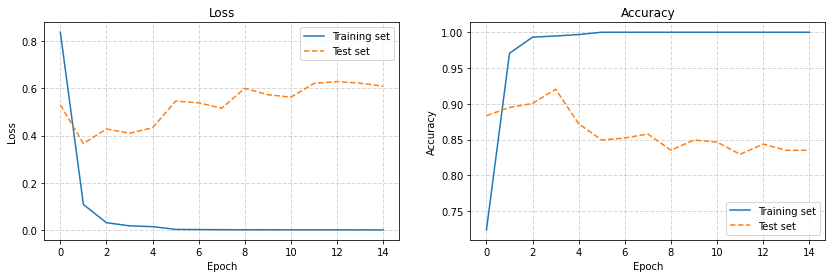

In [58]:
render_training_history(training_history)

In [59]:
training_history = model2.fit(
    x=dataset_train_augmented.repeat(),
    validation_data=dataset_test_shuffled.repeat(),
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/15
78/78 [==============================] - 0s 4ms/step - loss: 1.2954 - accuracy: 0.3674 - val_loss: 1.1207 - val_accuracy: 0.3352
Epoch 2/15
78/78 [==============================] - 1s 14ms/step - loss: 1.0271 - accuracy: 0.4715 - val_loss: 1.0624 - val_accuracy: 0.3722
Epoch 3/15
78/78 [==============================] - 1s 13ms/step - loss: 0.8010 - accuracy: 0.6234 - val_loss: 1.0964 - val_accuracy: 0.4148
Epoch 4/15
78/78 [==============================] - 1s 13ms/step - loss: 0.5860 - accuracy: 0.7524 - val_loss: 0.8330 - val_accuracy: 0.6193
Epoch 5/15
78/78 [==============================] - 1s 13ms/step - loss: 0.4788 - accuracy: 0.8035 - val_loss: 0.5212 - val_accuracy: 0.7614
Epoch 6/15
78/78 [==============================] - 1s 13ms/step - loss: 0.3243 - accuracy: 0.8738 - val_loss: 0.4583 - val_accuracy: 0.8097
Epoch 7/15
78/78 [==============================] - 1s 13ms/step - loss: 0.2957 - accuracy: 0.8863 - val_loss: 0.4985 - val_accuracy: 0.7784
Epoch 8/15
78/

In [60]:
# evaluate test images
test_loss, test_acc = model2.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 0s - loss: 2.0665 - accuracy: 0.5452


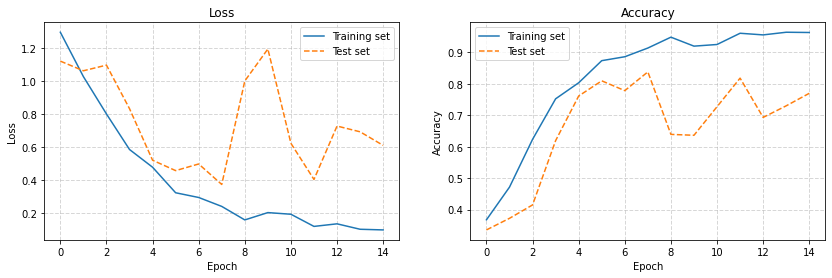

In [61]:
render_training_history(training_history)

### 3-1) 모델(LeNet) 자체의 한계 -> VGG16 Backbone Network

In [62]:
from tensorflow.keras.applications import VGG16

model_vgg = VGG16(weights=None, include_top=False, input_shape=(32, 32, 3))        # vgg16 불러오기
model_vgg.trainable = False                                                        # Backbone 학습x

vgg16 = keras.models.Sequential()
vgg16.add(model_vgg)                                                               # Backbone 모델 추가
vgg16.add(keras.layers.Flatten())                    
vgg16.add(keras.layers.Dense(4096, activation='relu', kernel_regularizer='l2'))    # Classifier 정의
vgg16.add(keras.layers.Dropout(0.5))
vgg16.add(keras.layers.Dense(4096, activation='relu', kernel_regularizer='l2'))    # l2 : l2 Norm
vgg16.add(keras.layers.Dropout(0.5))                                               # Regularization
vgg16.add(keras.layers.Dense(3, activation='softmax'))

vgg16.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 4096)              2101248   
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

In [63]:
EPOCH = 15
vgg16.compile(optimizer='adam',                         
             loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'], )

history = vgg16.fit(x_train_norm, y_train, epochs=EPOCH)

Epoch 1/15
69/69 [==============================] - 16s 234ms/step - loss: 7.1862 - accuracy: 0.3396
Epoch 2/15
69/69 [==============================] - 1s 12ms/step - loss: 1.1052 - accuracy: 0.3410
Epoch 3/15
69/69 [==============================] - 1s 12ms/step - loss: 1.1009 - accuracy: 0.3378
Epoch 4/15
69/69 [==============================] - 1s 12ms/step - loss: 1.1008 - accuracy: 0.3396
Epoch 5/15
69/69 [==============================] - 1s 12ms/step - loss: 1.1003 - accuracy: 0.3355
Epoch 6/15
69/69 [==============================] - 1s 12ms/step - loss: 1.1004 - accuracy: 0.3163
Epoch 7/15
69/69 [==============================] - 1s 12ms/step - loss: 1.1002 - accuracy: 0.3355
Epoch 8/15
69/69 [==============================] - 1s 12ms/step - loss: 1.1003 - accuracy: 0.3327
Epoch 9/15
69/69 [==============================] - 1s 13ms/step - loss: 1.0993 - accuracy: 0.3451
Epoch 10/15
69/69 [==============================] - 1s 12ms/step - loss: 1.0988 - accuracy: 0.3400
Epoch 1

In [64]:
# evaluate test images
test_loss, test_acc = vgg16.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 16s - loss: 1.0989 - accuracy: 0.3328


In [65]:
training_history = vgg16.fit(
    x=dataset_train.repeat(),
    validation_data=dataset_test_shuffled.repeat(),
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/15
78/78 [==============================] - 1s 16ms/step - loss: 1.0990 - accuracy: 0.3273 - val_loss: 1.0988 - val_accuracy: 0.3324
Epoch 2/15
78/78 [==============================] - 2s 20ms/step - loss: 1.0986 - accuracy: 0.3453 - val_loss: 1.0987 - val_accuracy: 0.3324
Epoch 3/15
78/78 [==============================] - 2s 20ms/step - loss: 1.0992 - accuracy: 0.3272 - val_loss: 1.0987 - val_accuracy: 0.3352
Epoch 4/15
78/78 [==============================] - 1s 19ms/step - loss: 1.0992 - accuracy: 0.3244 - val_loss: 1.0987 - val_accuracy: 0.3324
Epoch 5/15
78/78 [==============================] - 2s 20ms/step - loss: 1.0992 - accuracy: 0.3236 - val_loss: 1.0987 - val_accuracy: 0.3324
Epoch 6/15
78/78 [==============================] - 1s 18ms/step - loss: 1.0991 - accuracy: 0.3332 - val_loss: 1.0987 - val_accuracy: 0.3352
Epoch 7/15
78/78 [==============================] - 1s 19ms/step - loss: 1.0988 - accuracy: 0.3424 - val_loss: 1.0987 - val_accuracy: 0.3324
Epoch 8/15
78

In [66]:
# evaluate test images
test_loss, test_acc = vgg16.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 1s - loss: 1.0987 - accuracy: 0.3330


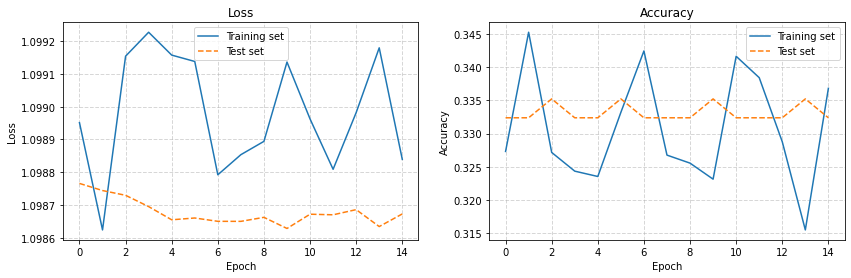

In [67]:
render_training_history(training_history)

In [68]:
training_history = vgg16.fit(
    x=dataset_train_augmented.repeat(),
    validation_data=dataset_test_shuffled.repeat(),
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/15
78/78 [==============================] - 1s 14ms/step - loss: 1.0992 - accuracy: 0.3157 - val_loss: 1.0986 - val_accuracy: 0.3324
Epoch 2/15
78/78 [==============================] - 2s 24ms/step - loss: 1.0988 - accuracy: 0.3227 - val_loss: 1.0986 - val_accuracy: 0.3352
Epoch 3/15
78/78 [==============================] - 2s 24ms/step - loss: 1.0987 - accuracy: 0.3308 - val_loss: 1.0986 - val_accuracy: 0.3324
Epoch 4/15
78/78 [==============================] - 2s 24ms/step - loss: 1.0990 - accuracy: 0.3272 - val_loss: 1.0986 - val_accuracy: 0.3324
Epoch 5/15
78/78 [==============================] - 2s 24ms/step - loss: 1.0988 - accuracy: 0.3195 - val_loss: 1.0986 - val_accuracy: 0.3352
Epoch 6/15
78/78 [==============================] - 2s 23ms/step - loss: 1.0991 - accuracy: 0.3075 - val_loss: 1.0986 - val_accuracy: 0.3352
Epoch 7/15
78/78 [==============================] - 2s 23ms/step - loss: 1.0987 - accuracy: 0.3304 - val_loss: 1.0986 - val_accuracy: 0.3324
Epoch 8/15
78

In [69]:
# evaluate test images
test_loss, test_acc = vgg16.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 1s - loss: 1.0986 - accuracy: 0.3328


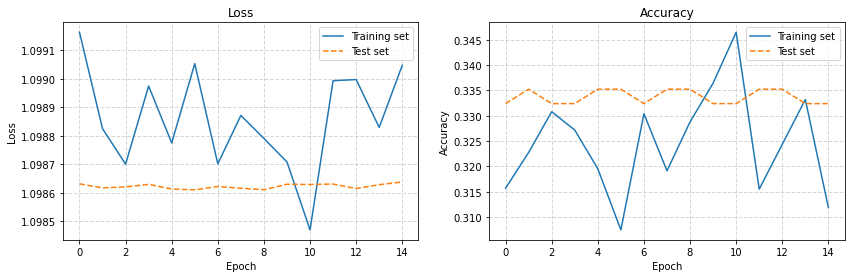

In [70]:
render_training_history(training_history)

## 이쯤에서 생각해볼 수 있는 부분
### 학습이 전혀 되고 있지 않은 듯 하다.. why?

- 학습 데이터 셋에 문제가 있는건가? (왜지..? 진짜 그냥 trainset 데이터가 단순해서?!)
- LeNet 모델의 한계로는 보이지 않음 (VGG도 성능이 좋지 않기에..)

### 3 - 2) 모델(LeNet) 자체의 한계 -> VGG16 Backbone Network (Transfer Learning)

In [71]:
from tensorflow.keras.applications import VGG16

model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))        # vgg16 불러오기
model_vgg.trainable = False                                                        # Backbone 학습x

vgg16 = keras.models.Sequential()
vgg16.add(model_vgg)                                                               # Backbone 모델 추가
vgg16.add(keras.layers.Flatten())                    
vgg16.add(keras.layers.Dense(4096, activation='relu', kernel_regularizer='l2'))    # Classifier 정의
vgg16.add(keras.layers.Dropout(0.5))
vgg16.add(keras.layers.Dense(4096, activation='relu', kernel_regularizer='l2'))    # l2 : l2 Norm
vgg16.add(keras.layers.Dropout(0.5))                                               # Regularization
vgg16.add(keras.layers.Dense(3, activation='softmax'))

vgg16.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 4096)              2101248   
_________________________________________________________________
dropout_2 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_3 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                

In [72]:
# fine-tuning
EPOCH = 15
vgg16.compile(optimizer='adam',                         
             loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'], )

history = vgg16.fit(x_train_norm, y_train, epochs=EPOCH)

Epoch 1/15
69/69 [==============================] - 1s 13ms/step - loss: 11.6121 - accuracy: 0.8743
Epoch 2/15
69/69 [==============================] - 1s 13ms/step - loss: 1.1005 - accuracy: 0.9730
Epoch 3/15
69/69 [==============================] - 1s 12ms/step - loss: 0.4853 - accuracy: 0.9781
Epoch 4/15
69/69 [==============================] - 1s 12ms/step - loss: 0.3916 - accuracy: 0.9744
Epoch 5/15
69/69 [==============================] - 1s 12ms/step - loss: 0.2959 - accuracy: 0.9813
Epoch 6/15
69/69 [==============================] - 1s 12ms/step - loss: 0.2994 - accuracy: 0.9790
Epoch 7/15
69/69 [==============================] - 1s 12ms/step - loss: 0.2465 - accuracy: 0.9790
Epoch 8/15
69/69 [==============================] - 1s 12ms/step - loss: 0.2474 - accuracy: 0.9817
Epoch 9/15
69/69 [==============================] - 1s 12ms/step - loss: 0.2414 - accuracy: 0.9776
Epoch 10/15
69/69 [==============================] - 1s 12ms/step - loss: 0.2034 - accuracy: 0.9845
Epoch 11

In [73]:
# evaluate test images
test_loss, test_acc = vgg16.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 1s - loss: 1.9660 - accuracy: 0.4618


In [74]:
training_history = vgg16.fit(
    x=dataset_train.repeat(),
    validation_data=dataset_test_shuffled.repeat(),
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/15
78/78 [==============================] - 1s 17ms/step - loss: 0.5687 - accuracy: 0.9006 - val_loss: 0.5537 - val_accuracy: 0.8608
Epoch 2/15
78/78 [==============================] - 2s 20ms/step - loss: 0.2971 - accuracy: 0.9658 - val_loss: 0.5203 - val_accuracy: 0.8551
Epoch 3/15
78/78 [==============================] - 1s 19ms/step - loss: 0.2382 - accuracy: 0.9763 - val_loss: 0.3719 - val_accuracy: 0.9062
Epoch 4/15
78/78 [==============================] - 2s 20ms/step - loss: 0.2035 - accuracy: 0.9795 - val_loss: 0.2911 - val_accuracy: 0.9517
Epoch 5/15
78/78 [==============================] - 2s 20ms/step - loss: 0.1893 - accuracy: 0.9815 - val_loss: 0.4517 - val_accuracy: 0.8324
Epoch 6/15
78/78 [==============================] - 1s 19ms/step - loss: 0.1883 - accuracy: 0.9795 - val_loss: 0.2446 - val_accuracy: 0.9688
Epoch 7/15
78/78 [==============================] - 2s 20ms/step - loss: 0.1795 - accuracy: 0.9827 - val_loss: 0.3274 - val_accuracy: 0.9375
Epoch 8/15
78

In [75]:
# evaluate test images
test_loss, test_acc = vgg16.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 1s - loss: 2.6025 - accuracy: 0.5046


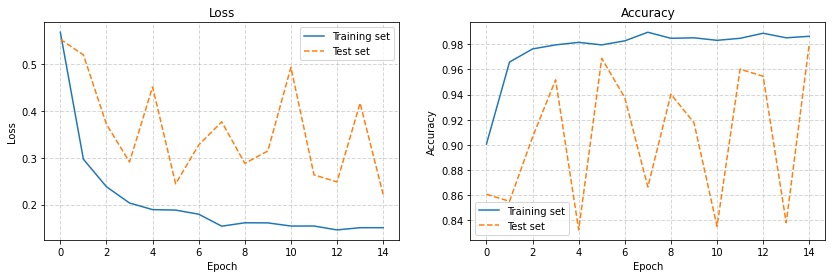

In [76]:
render_training_history(training_history)

In [77]:
training_history = vgg16.fit(
    x=dataset_train_augmented.repeat(),
    validation_data=dataset_test_shuffled.repeat(), 
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/15
78/78 [==============================] - 1s 14ms/step - loss: 0.8185 - accuracy: 0.7720 - val_loss: 0.4261 - val_accuracy: 0.9460
Epoch 2/15
78/78 [==============================] - 2s 24ms/step - loss: 0.5453 - accuracy: 0.8694 - val_loss: 0.4663 - val_accuracy: 0.8438
Epoch 3/15
78/78 [==============================] - 2s 23ms/step - loss: 0.4721 - accuracy: 0.8919 - val_loss: 0.4972 - val_accuracy: 0.8324
Epoch 4/15
78/78 [==============================] - 2s 23ms/step - loss: 0.4420 - accuracy: 0.8975 - val_loss: 0.5837 - val_accuracy: 0.8125
Epoch 5/15
78/78 [==============================] - 2s 24ms/step - loss: 0.4420 - accuracy: 0.9015 - val_loss: 0.7164 - val_accuracy: 0.8068
Epoch 6/15
78/78 [==============================] - 2s 24ms/step - loss: 0.3783 - accuracy: 0.9240 - val_loss: 0.4729 - val_accuracy: 0.8239
Epoch 7/15
78/78 [==============================] - 2s 23ms/step - loss: 0.3937 - accuracy: 0.9096 - val_loss: 0.5803 - val_accuracy: 0.8324
Epoch 8/15
78

In [78]:
# evaluate test images
test_loss, test_acc = vgg16.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 1s - loss: 2.6290 - accuracy: 0.4677


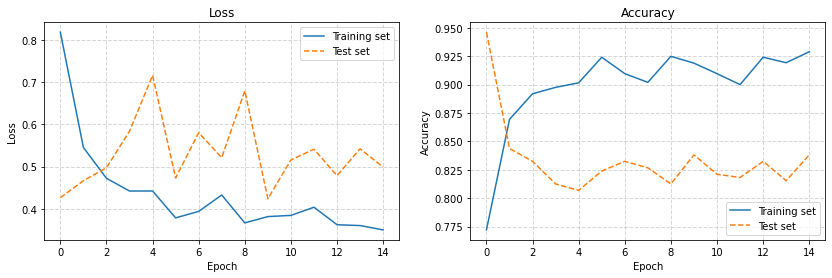

In [79]:
render_training_history(training_history)

참고할만한 링크 : https://colab.research.google.com/github/trekhleb/machine-learning-experiments/blob/master/experiments/rock_paper_scissors_cnn/rock_paper_scissors_cnn.ipynb